In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
data = pd.read_csv('housing.csv')

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


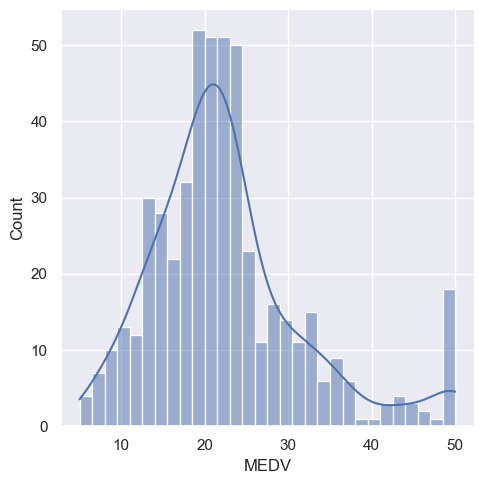

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.displot(data['MEDV'],bins=30,kde=True)

plt.show()

In [6]:
corr1 = data.corr().round(2)
corr1.shape

(14, 14)

<Axes: >

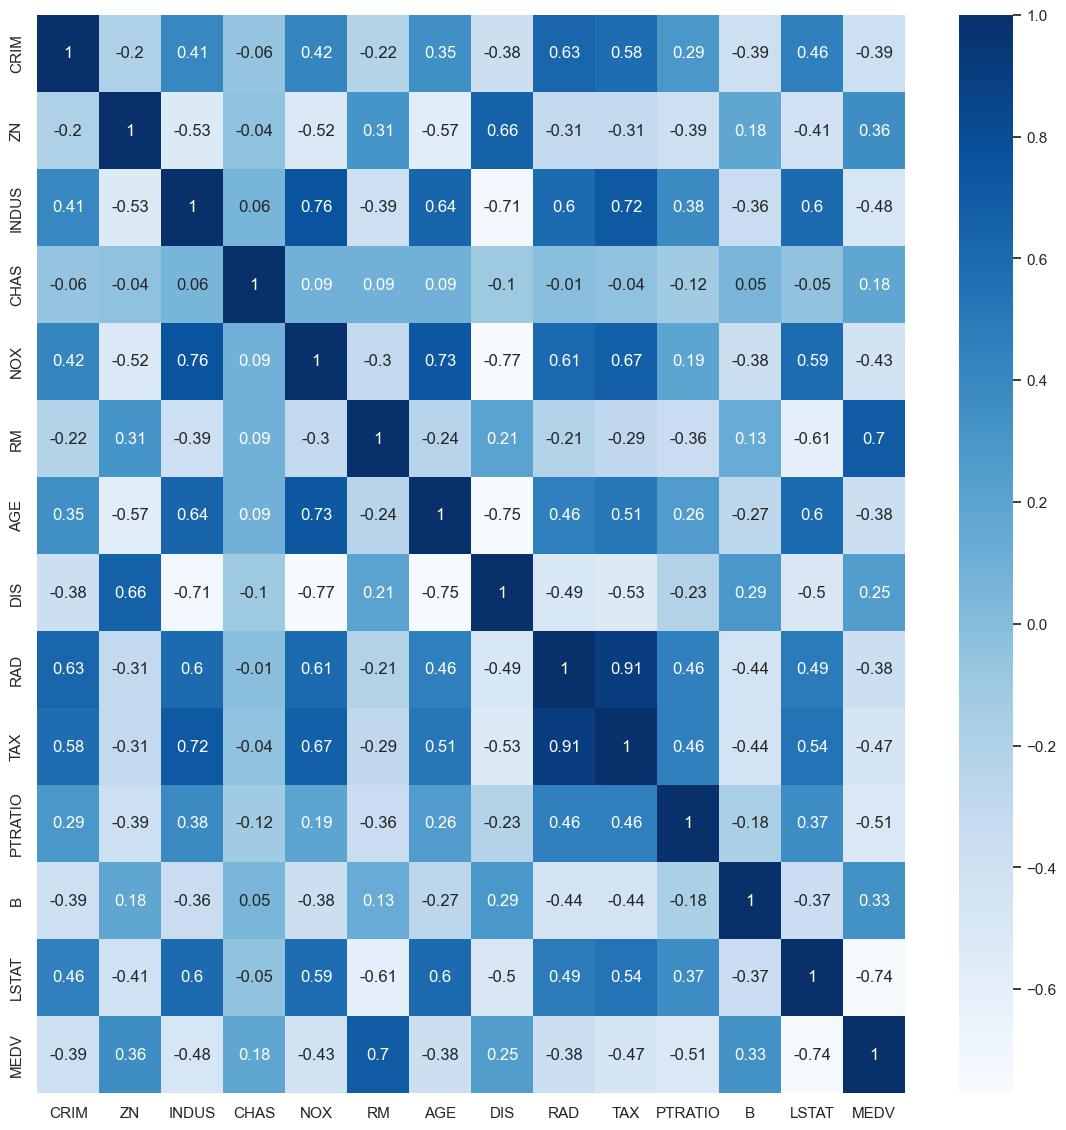

In [7]:
plt.figure(figsize=(14,14))

sns.heatmap(data=corr1, annot=True,cmap='Blues')

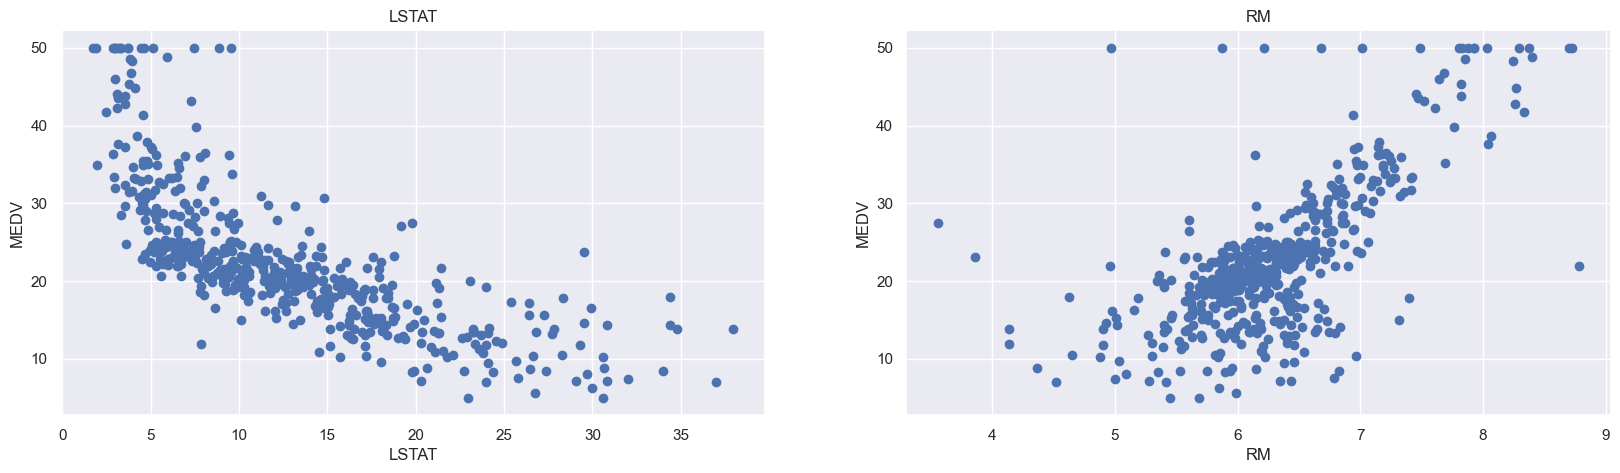

In [8]:
plt.figure(figsize=(20,5))

features = ['LSTAT','RM']
target = data['MEDV']

for i, col in enumerate(features):
  plt.subplot(1, len(features),i+1)
  x = data[col]
  y = target
  plt.scatter(x,y,marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

In [9]:
X = pd.DataFrame(np.c_[data['LSTAT'],data['RM']],columns=['LSTAT','RM'])
Y = data['MEDV']

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

modl = LinearRegression()
modl.fit(X_train,Y_train)

LinearRegression()

In [12]:
y_pred = modl.predict(X_train)
mse = (mean_squared_error(Y_train,y_pred))
r2 = r2_score(Y_train,y_pred)

print(mse)
print(r2)

30.27818500075151
0.6251836356449056


In [13]:
y1_pred = modl.predict(X_test)
mse1 = mean_squared_error(Y_test,y1_pred)
r2_test = r2_score(Y_test,y1_pred)

print(mse1)
print(r2_test)

32.08375607139395
0.6753556251471673


In [14]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X_train,Y_train)

RandomForestRegressor()

In [15]:
y_predict = reg.predict(X_train)

reg.score(X_train,Y_train)*100

96.10590537939551

In [16]:
reg.score(X_test,Y_test)*100

78.11753639719336

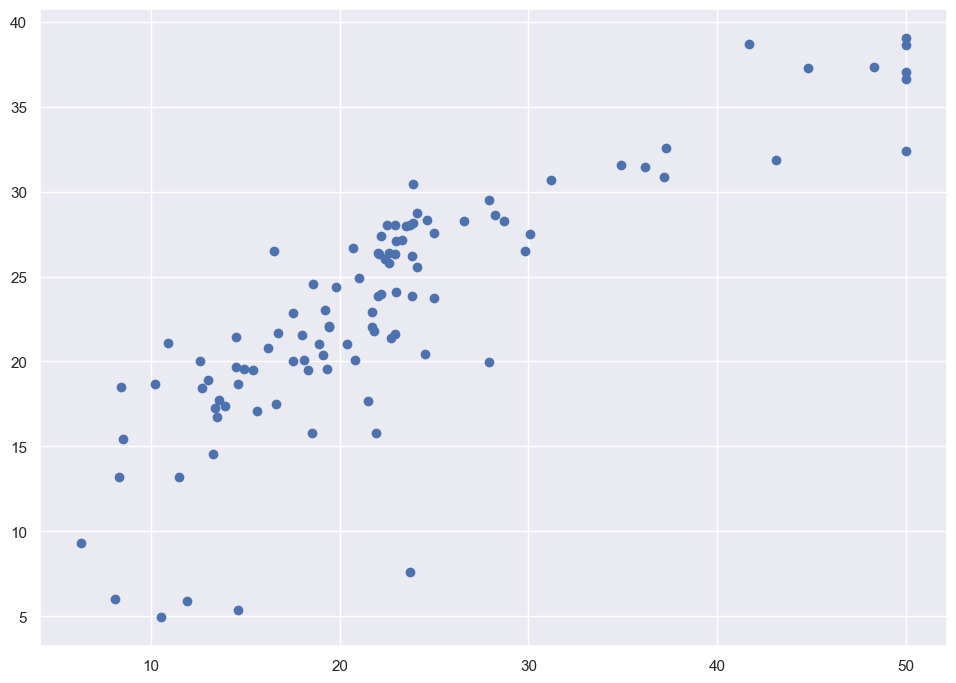

In [17]:
plt.scatter(Y_test,y1_pred)
plt.show()